# Hackathon Good Fast Cheap
## Group 7 Team Algorithm Constraint Using Random Forest
### Group Members: Peter Yonka, Jessica Bow, and Nolan Arendt

### Notebook Process
1. Loading libraries
2. Reading in data
3. Data cleaning
    - Removing ? and spaces in column names 
4. Cleaning check
    - .Unique error checking
5. Mapping
6. Outlier Assessment
7. Feature Engineering
8. Dummify categorical columns
9. Renaming of columns
10. Correlation Matrix
11. Model Prep.
    - X and Y variables
    - Baseline accuracy
12. Train/test Split
13. Model instatiation (Random Forests)
14. Model evaluation
15. Grid Search
16. AdaBoost Classifier

In [96]:
# Import libraries / Lesson 6.03
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

### Load Data

In [2]:
# Read in large train sample csv
large_df = pd.read_csv('./data/large_train_sample.csv')
# Visualize large train dataframe
large_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,Male,0,0,20,United-States,<=50K


### Data Cleaning

In [3]:
# Looking at shape of dataframe
large_df.shape

(32561, 14)

In [4]:
# Checking for null values in dataframe
large_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
wage              0
dtype: int64

In [5]:
# Trying to find out what fnlwgt stands for.

# fnlwgt: final weight. In other words, this is the number of people the census believes the entry represents
# http://cseweb.ucsd.edu/classes/sp15/cse190-c/reports/sp15/048.pdf

large_df['fnlwgt']

0         77516
1         83311
2        215646
3        234721
4        338409
          ...  
32556    257302
32557    154374
32558    151910
32559    201490
32560    287927
Name: fnlwgt, Length: 32561, dtype: int64

### Cleaning Workclass Column

In [6]:
# Finding where question mark value is in workclass 
large_df[large_df['workclass'].str.strip() == '?']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Male,0,0,60,South,>50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,Male,0,0,40,?,<=50K
69,25,?,200681,Some-college,10,Never-married,?,Own-child,Male,0,0,40,United-States,<=50K
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,Male,0,0,2,United-States,<=50K
106,17,?,304873,10th,6,Never-married,?,Own-child,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,Female,0,0,55,United-States,>50K
32531,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Female,0,0,99,United-States,<=50K
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,Male,0,0,10,United-States,>50K
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Female,0,0,32,United-States,<=50K


In [7]:
# Looking at workclass column to identify rows we need to clean
large_df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [8]:
# Finding all ? values in workclass and setting as np.nan for easier to clean
large_df['workclass'] = large_df['workclass'].str.strip().map(lambda x: np.nan if x=="?" else x)
large_df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', nan, 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [9]:
# Dropping null values set from above
large_df.dropna(inplace=True)
# Visualizing changes
large_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K


### Cleaning Occupation Column

In [10]:
# Finding out where ? is a value in occupation
large_df[large_df['occupation'].str.strip() == '?']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
5361,18,Never-worked,206359,10th,6,Never-married,?,Own-child,Male,0,0,40,United-States,<=50K
10845,23,Never-worked,188535,7th-8th,4,Divorced,?,Not-in-family,Male,0,0,35,United-States,<=50K
14772,17,Never-worked,237272,10th,6,Never-married,?,Own-child,Male,0,0,30,United-States,<=50K
20337,18,Never-worked,157131,11th,7,Never-married,?,Own-child,Female,0,0,10,United-States,<=50K
23232,20,Never-worked,462294,Some-college,10,Never-married,?,Own-child,Male,0,0,40,United-States,<=50K
32304,30,Never-worked,176673,HS-grad,9,Married-civ-spouse,?,Wife,Female,0,0,40,United-States,<=50K
32314,18,Never-worked,153663,Some-college,10,Never-married,?,Own-child,Male,0,0,4,United-States,<=50K


In [11]:
# Replacing occupation " ?" with Never worked, similar to their workclass
large_df['occupation'] = large_df['occupation'].replace(" ?", "Never worked")

In [12]:
# Looking at those in the workclass column that have never worked
large_df[large_df['workclass'] == 'Never-worked']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
5361,18,Never-worked,206359,10th,6,Never-married,Never worked,Own-child,Male,0,0,40,United-States,<=50K
10845,23,Never-worked,188535,7th-8th,4,Divorced,Never worked,Not-in-family,Male,0,0,35,United-States,<=50K
14772,17,Never-worked,237272,10th,6,Never-married,Never worked,Own-child,Male,0,0,30,United-States,<=50K
20337,18,Never-worked,157131,11th,7,Never-married,Never worked,Own-child,Female,0,0,10,United-States,<=50K
23232,20,Never-worked,462294,Some-college,10,Never-married,Never worked,Own-child,Male,0,0,40,United-States,<=50K
32304,30,Never-worked,176673,HS-grad,9,Married-civ-spouse,Never worked,Wife,Female,0,0,40,United-States,<=50K
32314,18,Never-worked,153663,Some-college,10,Never-married,Never worked,Own-child,Male,0,0,4,United-States,<=50K


### Cleaning Native-Country Column

In [13]:
# Finding an error in countries, ?
large_df['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary', ' Holand-Netherlands'], dtype=object)

In [14]:
# Replacing native-country question marks with unknown, we do want to replace with a random country without knowing
large_df['native-country'] = large_df['native-country'].replace(" ?", "Unknown")

### Checking For .Unique Errors

In [15]:
# Visualizing columns to error check
large_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'wage'],
      dtype='object')

In [16]:
# Checking age values for errors
large_df['age'].unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 33, 76, 55, 61, 70, 64, 71, 66, 51, 58, 26, 17, 60,
       90, 75, 65, 77, 62, 63, 67, 74, 72, 69, 68, 73, 81, 78, 88, 80, 84,
       83, 85, 82, 86], dtype=int64)

In [17]:
# Checking age values for errors
large_df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [18]:
# Checking age values for errors
large_df['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
       ' 12th', ' 1st-4th'], dtype=object)

In [19]:
# Checking age values for errors
large_df['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [20]:
# Checking age values for errors
large_df['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv', 'Never worked'], dtype=object)

In [21]:
# Checking age values for errors
large_df['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [22]:
# Checking age values for errors
large_df['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [23]:
# Checking age values for errors
large_df['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', 'Unknown',
       ' Mexico', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Poland', ' Columbia',
       ' Cambodia', ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti',
       ' Portugal', ' Dominican-Republic', ' El-Salvador', ' France',
       ' Guatemala', ' Italy', ' China', ' South', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [24]:
# Checking age values for errors
large_df['wage'].unique()

array([' <=50K', ' >50K'], dtype=object)

### Removing Spaces In Workclass, Native Country, Occupation, Relationship, Marital Status, Education

In [25]:
# Stripping columns with spaces in them
# Easier to work with
large_df['workclass'] = large_df['workclass'].map(lambda x: x.strip())
large_df['native-country'] = large_df['native-country'].map(lambda x: x.strip())
large_df['occupation'] = large_df['occupation'].map(lambda x: x.strip())
large_df['relationship'] = large_df['relationship'].map(lambda x: x.strip())
large_df['marital-status'] = large_df['marital-status'].map(lambda x: x.strip())
large_df['education'] = large_df['education'].map(lambda x: x.strip())

### Mapping Column Wage and Column Sex

In [26]:
# Mapping wage, over 50k as 1, under 50k as 0
large_df['wage'] = large_df['wage'].map({' <=50K'  : 0 , ' >50K':1})

In [27]:
# Mapping sex, male as 0, female as 0
large_df['sex'] = large_df['sex'].map({' Male'  : 0 , ' Female':1})

### Outlier Assessment

In [28]:
# sns.pairplot(data = large_df, corner = True); 

### Feature Engineering

In [29]:
# COMING BACK TO F.E. AFTER MODELING
large_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,0,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,0,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,0,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,0,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,1,0,0,40,Cuba,0


### Dummify Categoricals

In [30]:
# Looking at columns we want to dummify
large_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'wage'],
      dtype='object')

In [31]:
# Dummify workclass, education, martial status, occupation, relationship and native country
large_df = pd.get_dummies(data = large_df, columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'native-country'], drop_first = True)
large_df.head()

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,wage,workclass_Local-gov,workclass_Never-worked,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Unknown,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,0,2174,0,40,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,0,13,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,0,40,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,0,40,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# Checking datatypes before moving forward
large_df.dtypes

age                               int64
fnlwgt                            int64
education-num                     int64
sex                               int64
capital-gain                      int64
                                  ...  
native-country_Trinadad&Tobago    uint8
native-country_United-States      uint8
native-country_Unknown            uint8
native-country_Vietnam            uint8
native-country_Yugoslavia         uint8
Length: 96, dtype: object

### Rename Sex and Wage

In [33]:
# Renaming sex to is_female, and wage to over_50k because we mapped these columns earlier
large_df = large_df.rename(columns = {'sex': 'is_female', 'wage':'over_50k'})

### Feature Engineering

In [63]:
large_df['age']

0        39
1        50
2        38
3        53
4        28
         ..
32556    27
32557    40
32558    58
32559    22
32560    52
Name: age, Length: 30725, dtype: int64

In [65]:
large_df['age_squared'] = large_df['age'] ** 2
large_df['age_squared']

0        1521
1        2500
2        1444
3        2809
4         784
         ... 
32556     729
32557    1600
32558    3364
32559     484
32560    2704
Name: age_squared, Length: 30725, dtype: int64

### Correlation Matrix

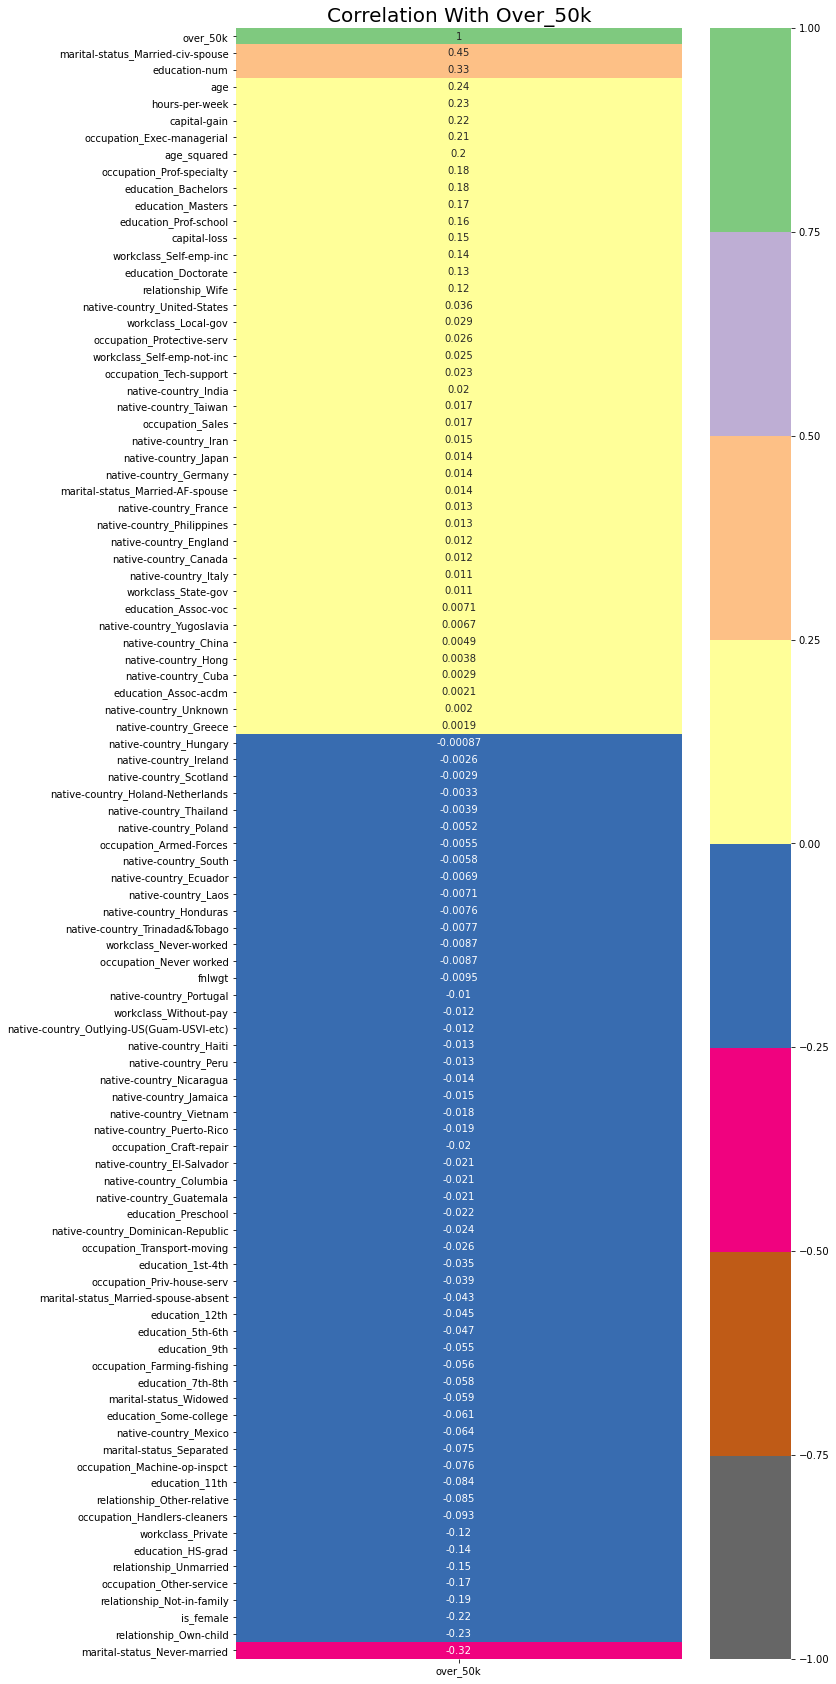

In [66]:
# Setting figure size for correlation
plt.figure(figsize=(10, 30))

# Setting variable large_corr as correlations with over_50k
large_corr = large_df.corr()[['over_50k']]

# Using seaborn heatmap to display correlations between Over_50k (originally wage)
sns.heatmap(large_corr.sort_values(by='over_50k', ascending=False),
            vmin = -1, vmax=1,
            cmap ='Accent_r',
            annot = True,);

# Setting title
plt.title("Correlation With Over_50k", size = 20);

In [35]:
# top_ten_corr = large_corr[large_corr['over_50k'] > 0].sort_values(by = 'over_50k', ascending=False)[0:11]
# top_ten_index = list(top_ten_corr.index)
# top_ten_index.remove('over_50k')
# top_ten_index

In [36]:
# lowest_ten_corr = large_corr[large_corr['over_50k'] < 0].sort_values(by = 'over_50k', ascending=True)[0:10]
# lowest_ten_index = list(lowest_ten_corr.index)
# lowest_ten_index

### Model Prep: Create X and y variables

In [73]:
# Setting features as top ten correlated and lowest ten correlated
features = ['marital-status_Married-civ-spouse', 'education-num', 'age', 'hours-per-week',
 'capital-gain', 'occupation_Exec-managerial', 'occupation_Prof-specialty', 'education_Bachelors',
 'education_Masters', 'education_Prof-school', 'marital-status_Never-married', 'relationship_Own-child',
 'is_female', 'relationship_Not-in-family', 'occupation_Other-service', 'relationship_Unmarried', 
'education_HS-grad', 'workclass_Private', 'occupation_Handlers-cleaners', 'relationship_Other-relative']

# X equal to features set above
X = large_df[features]

# y set to 'over_50k' (originally wage)
y = large_df['over_50k']

In [79]:
X_two = large_df.drop(columns = ['over_50k'])

y_two = large_df['over_50k']

### Baseline Accuracy

In [38]:
# Calculating baseline accuracy
y.value_counts(normalize = True)

0    0.751017
1    0.248983
Name: over_50k, dtype: float64

### Train Test Split

In [74]:
# Setting up Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                  random_state=42, 
                                                  stratify=y)

In [80]:
X_train_two, X_test_two, y_train_two, y_test_two = train_test_split(X_two, y_two, 
                                                  random_state=42, 
                                                  stratify=y)

### Model Instantiation

In [40]:
# Instatiate random forest model
rf = RandomForestClassifier()

### Model Evaluation

In [41]:
# Calculating cross val score from random forest model
print("Cross Val Score:", cross_val_score(rf, X_train, y_train, cv = 5).mean())

Cross Val Score: 0.8268887129800391


### Grid Search

In [42]:
#model_params = {}
#count = 0

In [53]:
# Setting random forest parameters
rf_params = {
    'n_estimators': [70, 75, 80, 85, 90, 95, 100, 105, 110],
    'max_depth': [10, 11, 12, 13, 14, 15],
}

# Setting gridsearch using random forest, parameters as rf_params, cv of 5, and n_jobs of 12
gs = GridSearchCV(rf, param_grid=rf_params, cv = 5, n_jobs = 12)

# Fitting gridsearch with training data
gs.fit(X_train, y_train)

# Adding 1 to count for multiple model scores
count += 1

# Setting column score as gridsearch best score
gs.best_params_['score'] = gs.best_score_

# Setting column training score as gridsearch score on training data
gs.best_params_['training_score'] = gs.score(X_train, y_train)

# Setting column testing score as gridsearch score on testing data
gs.best_params_['testing_score'] = gs.score(X_test, y_test)

# Giving our index a numbering order (model_1, model_2, etc.)
model_params[f'model_{count}'] = gs.best_params_

# Creating a dataframe from our model creations
model_df = pd.DataFrame.from_dict(model_params, orient='index')

# Visualize dataframe
model_df

,max_depth,n_estimators,score,training_score,testing_score
model_1,5,150,0.840863,0.841384,0.846264
model_2,8,75,0.846157,0.849846,0.851211
model_3,10,150,0.848544,0.858612,0.853163
model_4,12,150,0.849152,0.867205,0.851471
model_5,12,100,0.848978,0.866684,0.852773
model_6,12,110,0.848891,0.866901,0.852122
model_7,12,90,0.849195,0.866337,0.853554
model_8,11,105,0.849152,0.862778,0.852252


### GridSearch With All Columns

In [81]:
#model_params_fe = {}
#count_fe = 0

In [83]:
# Setting random forest parameters
rf_params = {
    'n_estimators': [75],
    'max_depth': [17],
}

# Setting gridsearch using random forest, parameters as rf_params, cv of 5, and n_jobs of 12
gs_fe = GridSearchCV(rf, param_grid = rf_params, cv = 5, n_jobs = 12)

# Fitting gridsearch with training data
gs_fe.fit(X_train_two, y_train_two)

# Adding 1 to count for multiple model scores
count_fe += 1

# Setting column score as gridsearch best score
gs_fe.best_params_['score'] = gs_fe.best_score_

# Setting column training score as gridsearch score on training data
gs_fe.best_params_['training_score'] = gs_fe.score(X_train_two, y_train_two)

# Setting column testing score as gridsearch score on testing data
gs_fe.best_params_['testing_score'] = gs_fe.score(X_test_two, y_test_two)

# Giving our index a numbering order (model_1, model_2, etc.)
model_params_fe[f'model_{count_fe}'] = gs_fe.best_params_

# Creating a dataframe from our model creations
model_df_fe = pd.DataFrame.from_dict(model_params_fe, orient='index')

# Visualize dataframe
model_df_fe

,max_depth,n_estimators,score,training_score,testing_score
model_1,15,75,0.857918,0.885171,0.859021
model_2,17,75,0.860261,0.900577,0.860844


### AdaBoostClassifier

In [44]:
#model_params_two = {}
#count_two = 0

In [56]:
# Instantiate adaboostclassifier
ada = AdaBoostClassifier(base_estimator=RandomForestClassifier())

# Setting adaboost parameters
ada_params = {
    'n_estimators': [80, 90, 100],
    'base_estimator__max_depth': [2, 3, 4],
    'learning_rate': [.90, .95, 1.]
}

# Setting gridsearch using adaboost, ada parameters, cross vals of 3, and n_jobs of 12
gs_two = GridSearchCV(ada, param_grid=ada_params, cv=3, n_jobs = 12)

# Fitting gridsearch with training data
gs_two.fit(X_train, y_train)

# Adding one to counter
count_two += 1

# Setting column score as gridsearch best score
gs_two.best_params_['score'] = gs_two.best_score_

# Setting column training score as gridsearch score on training data
gs_two.best_params_['training_score'] = gs_two.score(X_train, y_train)

# Setting column testing score as gridsearch score on testing data
gs_two.best_params_['testing_score'] = gs_two.score(X_test, y_test)

# Giving our index a numbering order (model_1, model_2, etc.)
model_params_two[f'model_{count_two}'] = gs_two.best_params_

# Creating a dataframe from our model creations
model_df_two = pd.DataFrame.from_dict(model_params_two, orient='index')

# Visualize dataframe
model_df_two

,base_estimator__max_depth,learning_rate,n_estimators,score,training_score,testing_score
model_1,2,1.00,100,0.851886,0.856312,0.854725
model_2,3,0.95,90,0.853795,0.862344,0.855637
model_3,3,0.90,100,0.853708,0.862344,0.856418


### AdaBoost Classifier All Columns

In [86]:
#model_params_fe_two = {}
#count_fe_two = 0

In [88]:
# Instantiate adaboostclassifier
ada = AdaBoostClassifier(base_estimator=RandomForestClassifier())

# Setting adaboost parameters
ada_params = {
    'n_estimators': [90],
    'base_estimator__max_depth': [4],
    'learning_rate': [.90]
}

# Setting gridsearch using adaboost, ada parameters, cross vals of 3, and n_jobs of 12
gs_fe_two = GridSearchCV(ada, param_grid=ada_params, cv=3, n_jobs = 12)

# Fitting gridsearch with training data
gs_fe_two.fit(X_train_two, y_train_two)

# Adding one to counter
count_fe_two += 1

# Setting column score as gridsearch best score
gs_fe_two.best_params_['score'] = gs_fe_two.best_score_

# Setting column training score as gridsearch score on training data
gs_fe_two.best_params_['training_score'] = gs_fe_two.score(X_train_two, y_train_two)

# Setting column testing score as gridsearch score on testing data
gs_fe_two.best_params_['testing_score'] = gs_fe_two.score(X_test_two, y_test_two)

# Giving our index a numbering order (model_1, model_2, etc.)
model_params_fe_two[f'model_{count_fe_two}'] = gs_fe_two.best_params_

# Creating a dataframe from our model creations
model_df_fe_two = pd.DataFrame.from_dict(model_params_fe_two, orient='index')

# Visualize dataframe
model_df_fe_two

,base_estimator__max_depth,learning_rate,n_estimators,score,training_score,testing_score
model_1,4,0.90,90,0.866467,0.887081,0.868133
model_2,4,0.85,90,0.866814,0.885649,0.867352


In [89]:
ada_final_model = AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=4), learning_rate=0.90, n_estimators=90)

In [90]:
ada_final_model.fit(X_train_two, y_train_two)

AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=4),
                   learning_rate=0.9, n_estimators=90)

In [94]:
print("Training Score:", ada_final_model.score(X_train_two, y_train_two))
print("Testing Score:", ada_final_model.score(X_test_two, y_test_two))

Training Score: 0.887341058021959
Testing Score: 0.8682634730538922


### Read In Testing Data

In [166]:
test_data = pd.read_csv('./data/test_data.csv')
test_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Male,7688,0,40,United-States
4,18,?,103497,Some-college,10,Never-married,?,Own-child,Female,0,0,30,United-States


### Matching Testing Data With Cleaned Data

In [167]:
# Stripping workclass and replacing ? with Not_available
test_data['workclass'] = test_data['workclass'].str.strip().map(lambda x: 'Not_Available' if x=="?" else x)

In [172]:
# Replacing ? in occupaton with Never Worked
test_data['occupation'] = test_data['occupation'].replace(" ?", "Never worked")

In [173]:
# Replacing ? in native_country with Unknown
test_data['native-country'] = test_data['native-country'].replace(" ?", "Unknown")

In [174]:
# Removing spaces in columns
test_data['workclass'] = test_data['workclass'].map(lambda x: x.strip())
test_data['native-country'] = test_data['native-country'].map(lambda x: x.strip())
test_data['occupation'] = test_data['occupation'].map(lambda x: x.strip())
test_data['relationship'] = test_data['relationship'].map(lambda x: x.strip())
test_data['marital-status'] = test_data['marital-status'].map(lambda x: x.strip())
test_data['education'] = test_data['education'].map(lambda x: x.strip())

In [175]:
# Mapping sex
test_data['sex'] = test_data['sex'].map({' Male'  : 0 , ' Female':1})

In [176]:
# Dummify columns
test_data = pd.get_dummies(data = test_data, columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'native-country'], drop_first = True)

In [179]:
# Drop workclass_not_available
test_data.drop(columns = ['workclass_Not_Available'], inplace=True)

In [185]:
# Renaming sex to is_female because mapped sex's as 0, 1 
test_data = test_data.rename(columns = {'sex': 'is_female'})

### Matching Columns Two DataSets

In [197]:
# Finding where columns match between large_df and test_data
match_cols = set(list(large_df.columns)).intersection(list(test_data.columns))

In [198]:
# List of columns that are in both dataframes
match_cols

{'age',
 'capital-gain',
 'capital-loss',
 'education-num',
 'education_11th',
 'education_12th',
 'education_1st-4th',
 'education_5th-6th',
 'education_7th-8th',
 'education_9th',
 'education_Assoc-acdm',
 'education_Assoc-voc',
 'education_Bachelors',
 'education_Doctorate',
 'education_HS-grad',
 'education_Masters',
 'education_Preschool',
 'education_Prof-school',
 'education_Some-college',
 'fnlwgt',
 'hours-per-week',
 'is_female',
 'marital-status_Married-AF-spouse',
 'marital-status_Married-civ-spouse',
 'marital-status_Married-spouse-absent',
 'marital-status_Never-married',
 'marital-status_Separated',
 'marital-status_Widowed',
 'native-country_Canada',
 'native-country_China',
 'native-country_Columbia',
 'native-country_Cuba',
 'native-country_Dominican-Republic',
 'native-country_Ecuador',
 'native-country_El-Salvador',
 'native-country_England',
 'native-country_France',
 'native-country_Germany',
 'native-country_Greece',
 'native-country_Guatemala',
 'native-country_

### Predictions

In [199]:
sub_test = test_data[match_cols]
# Setting X_three to where columns match
X_three = large_df[match_cols]
# Setting y_three to target prediction
y_three = large_df['over_50k']

In [200]:
X_train_three, X_test_three, y_train_three, y_test_three = train_test_split(X_three, y_three, 
                                                  random_state=42, 
                                                  stratify=y)

In [201]:
# AdaBoost Final Model with parameters set using random forest
ada_final_model = AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=4), learning_rate=0.90, n_estimators=90)

In [202]:
# Fitting final model on X_train_three and Y_train_three set above
ada_final_model.fit(X_train_three, y_train_three)

AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=4),
                   learning_rate=0.9, n_estimators=90)

In [203]:
# Printing training and testing scores of final model with X_train_three, y_train_three, X_test_three, and y_test_three
print("Training Score:", ada_final_model.score(X_train_three, y_train_three))
print("Testing Score:", ada_final_model.score(X_test_three, y_test_three))

Training Score: 0.8853013930477802
Testing Score: 0.8686539963551159


In [205]:
# Setting variable preds and predictions of sub_test
preds = ada_final_model.predict(sub_test)

In [208]:
# Setting pred_dataframe with column Predictions as preds
pred_df = pd.DataFrame({'Predictions' : preds})

In [209]:
# Visualizing pred_dataframe
pred_df

,Predictions
0,0
1,0
2,0
3,1
4,0
...,...
16276,0
16277,0
16278,1
16279,0


In [210]:
# Exporting pred dataframe to csv for sumbission!
pred_df.to_csv('./data/7-group-submission.csv', index=False)

### Export DataFrames to CSV

In [59]:
# Save Random Forest model scores dataframe to data folder.
#model_df.to_csv('./data/random_forest_scores.csv', index=False)

In [60]:
# Save Random Forest adaboost model scores dataframe to data folder.
#model_df_two.to_csv('./data/random_forest_adaboost_scores.csv', index=False)